In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, minmax_scale, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
fruits = pd.read_csv("E:/Python Programs/fruits.csv")
fruits.head()

,color,sphericity,weight,label
0,Orange,0.947,120,Orange
1,Orange,0.917,125,Orange
2,Orange,0.923,110,Orange
3,Orange,0.916,123,Orange
4,Orange,0.943,124,Orange


In [3]:
X = fruits[["sphericity", "weight"]]
y = fruits["label"]

In [4]:
# before scaling

X.describe()

,sphericity,weight
count,60.000000,60.000000
mean,0.820583,142.750000
std,0.067577,23.352585
min,0.710000,101.000000
25%,0.767250,124.000000
50%,0.823000,143.000000
75%,0.870500,164.000000
max,0.947000,184.000000


In [5]:
X_scaled = pd.DataFrame(minmax_scale(X), columns=X.columns)
X_scaled.head()

,sphericity,weight
0,1.000000,0.228916
1,0.873418,0.289157
2,0.898734,0.108434
3,0.869198,0.265060
4,0.983122,0.277108


In [6]:
# after scaling

X_scaled.describe()

,sphericity,weight
count,60.000000,60.000000
mean,0.466596,0.503012
std,0.285133,0.281356
min,0.000000,0.000000
25%,0.241561,0.277108
50%,0.476793,0.506024
75%,0.677215,0.759036
max,1.000000,1.000000


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, random_state=10)
X_train.shape, y_train.shape

((45, 2), (45,))

In [8]:
X_train.index, y_train.index

(Index([ 6, 45, 57, 47, 10, 44, 50, 18,  4,  1, 12, 30, 22, 54, 32, 53, 19, 34,
         5, 13, 14, 41, 51, 33, 24, 11, 43, 16, 58, 40, 42, 56, 59,  8, 55, 52,
        48, 29, 25, 28, 49,  0, 15, 36,  9],
       dtype='int64'),
 Index([ 6, 45, 57, 47, 10, 44, 50, 18,  4,  1, 12, 30, 22, 54, 32, 53, 19, 34,
         5, 13, 14, 41, 51, 33, 24, 11, 43, 16, 58, 40, 42, 56, 59,  8, 55, 52,
        48, 29, 25, 28, 49,  0, 15, 36,  9],
       dtype='int64'))

In [9]:
X_test.index, y_test.index

(Index([31, 3, 38, 27, 21, 17, 46, 2, 23, 26, 35, 39, 20, 37, 7], dtype='int64'),
 Index([31, 3, 38, 27, 21, 17, 46, 2, 23, 26, 35, 39, 20, 37, 7], dtype='int64'))

In [10]:
X_train.head()

,sphericity,weight
6,0.814346,0.409639
45,0.383966,0.831325
57,0.181435,0.915663
47,0.569620,0.638554
10,0.502110,0.385542


In [11]:
y_train.head()

6     Orange
45     Apple
57     Apple
47     Apple
10    Orange
Name: label, dtype: object

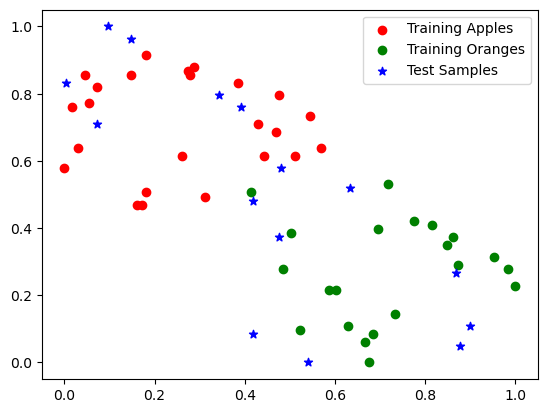

In [12]:
plt.scatter(data=X_train[y_train=="Apple"], x="sphericity", y="weight", c="red", label="Training Apples")
plt.scatter(data=X_train[y_train=="Orange"], x="sphericity", y="weight", c="green", label="Training Oranges")
plt.scatter(data=X_test, x="sphericity", y="weight", marker="*", c="blue", label="Test Samples")
plt.legend()
plt.show()

In [37]:
model = KNeighborsClassifier(n_neighbors=5, weights="distance", p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(p=1, weights='distance')

In [38]:
y_predict = model.predict(X_test)
y_predict

array(['Apple', 'Orange', 'Apple', 'Orange', 'Apple', 'Orange', 'Apple',
       'Orange', 'Orange', 'Orange', 'Apple', 'Apple', 'Orange', 'Apple',
       'Orange'], dtype=object)

In [39]:
accuracy_score(y_test, y_predict)

0.9333333333333333

In [40]:
confusion_matrix(y_test, y_predict)

array([[6, 0],
       [1, 8]], dtype=int64)

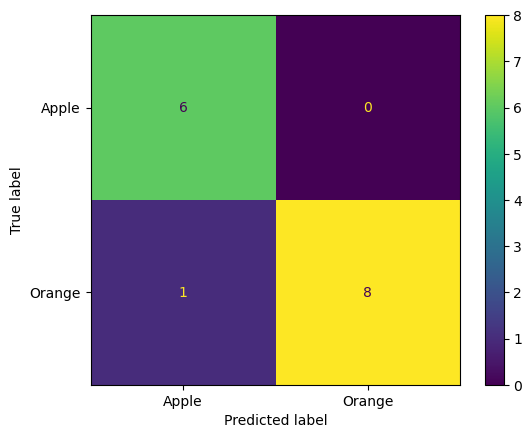

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

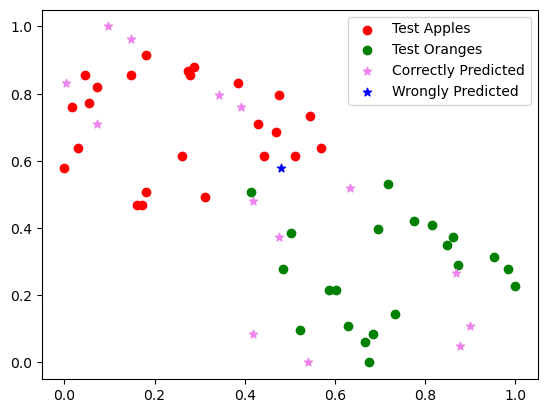

In [42]:
plt.scatter(data=X_train[y_train=="Apple"], x="sphericity", y="weight", c="red", label="Test Apples")
plt.scatter(data=X_train[y_train=="Orange"], x="sphericity", y="weight", c="green", label="Test Oranges")
plt.scatter(data=X_test[y_predict==y_test], x="sphericity", y="weight", c="violet", marker='*', label="Correctly Predicted")
plt.scatter(data=X_test[y_predict!=y_test], x="sphericity", y="weight", c="blue", marker='*', label="Wrongly Predicted")
plt.legend()
plt.show()

In [31]:
# a is star, b is green, and c is red

a=np.array([0.41, 0.44])
b=np.array([0.41, 0.45])
c=np.array([0.25, 0.45])

In [35]:
# a-b after scaling

np.sqrt((0.41-0.41)**2 + (0.45-0.44)**2)

0.010000000000000009

In [36]:
# a-c after scaling

np.sqrt((0.25-0.41)**2 + (0.45-0.44)**2)

0.16031219541881395